In [2]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
import h5py
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
def calculateHourlyUsage(data):
    cols = ['hour','no_of_jobs','machines', 'mean_cpu_usage']
    result = pd.DataFrame(columns=cols)
    print("started loading")
    for i in tqdm(range(30 * 24)):
        range_min = i * 3600 * (10**6)
        range_max = (i + 1) * 3600 * (10**6)
        jobs_of_hour = data[(data['end_time'] >= range_min) & (data['end_time'] < range_max)]
        no_of_jobs = len(jobs_of_hour['job_id'].unique())
        avg_cpu = np.average(jobs_of_hour['mean_cpu_usage'])
        machines = len(jobs_of_hour['machine_id'].unique())
        output_data = pd.DataFrame(columns=cols,data=[[i,no_of_jobs,machines, avg_cpu]])
        result = result.append(output_data)
    return result
def hour_to_day(hour_input):
    start_date = datetime.datetime(2011, 5, 1, 19, 0)
    datee = start_date + timedelta(microseconds = hour_input)
    print datee
    return datee.day - start_date.day
hour_to_day(50758000000)

2011-05-02 09:05:58


1

In [4]:
data_dir = "./data/task_usage/"

task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

In [5]:
output_dataframe = pd.DataFrame()
for i in tqdm(range(60)):
    file_str = str(i).zfill(5) 
#     print file_str
    df = pd.read_csv(data_dir+"part-"+file_str+"-of-00500.csv.gz",header=None)
    df.columns = task_usage_header
    df.drop(df.columns[[0,6,7,8,9,10,11,12,13,14,15,16,17,18,19]], axis=1,inplace=True)
    output_dataframe = output_dataframe.append(df)
#     output_data_dir = "./data/task_usage_input_timeseries/part-"+file_str+"-of-00500.csv"
#     df.to_csv(output_data_dir, sep='\t')
#     break

100%|██████████| 60/60 [27:27<00:00, 27.46s/it]


In [6]:
output_dataframe_final = output_dataframe

In [7]:
output_dataframe_final

,end_time,job_id,task_index,machine_id,mean_cpu_usage
0,900000000,3418309,0,4155527081,0.001562
1,900000000,3418309,1,329150663,0.001568
2,900000000,3418314,0,3938719206,0.000307
3,900000000,3418314,1,351618647,0.000300
4,900000000,3418319,0,431052910,0.000461
5,900000000,3418319,1,257348783,0.000519
6,900000000,3418324,0,5655258253,0.000381
7,900000000,3418324,1,3550322224,0.000327
8,900000000,3418329,0,1303745,0.002518
9,900000000,3418329,1,3894543095,0.002705


In [8]:
output_dataframe_final = calculateHourlyUsage(output_dataframe_final)

  0%|          | 0/720 [00:00<?, ?it/s]

started loading


 12%|█▏        | 84/720 [02:40<20:12,  1.91s/it]/Users/sanjayreddy/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/sanjayreddy/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 720/720 [14:12<00:00,  1.18s/it]


In [9]:
output_dataframe_final = output_dataframe_final[output_dataframe_final['hour']<84]

In [10]:
output_dataframe_final

,hour,no_of_jobs,machines,mean_cpu_usage
0,0,4513,12476,0.017537
0,1,4688,12476,0.016717
0,2,4620,12478,0.016284
0,3,4855,12485,0.015711
0,4,4719,12485,0.014981
0,5,5073,12485,0.014952
0,6,5044,12480,0.013942
0,7,4716,12479,0.015022
0,8,4481,12483,0.016499
0,9,4619,12484,0.016580


In [11]:
X = np.array(output_dataframe_final['mean_cpu_usage'].tolist())

In [12]:
X

array([ 0.01753654,  0.01671724,  0.01628377,  0.01571072,  0.01498057,
        0.01495185,  0.01394167,  0.01502232,  0.01649895,  0.01657997,
        0.01664338,  0.01745756,  0.01696358,  0.0181543 ,  0.01921209,
        0.0185627 ,  0.0188185 ,  0.01891544,  0.02145261,  0.02142198,
        0.01988755,  0.02009669,  0.02083384,  0.01824115,  0.01937279,
        0.01865439,  0.01282313,  0.00946815,  0.00866318,  0.00976388,
        0.00873009,  0.01345372,  0.01627282,  0.01631837,  0.01653781,
        0.01640791,  0.01659396,  0.01794766,  0.01857603,  0.01922389,
        0.01976533,  0.01984754,  0.01941553,  0.02035863,  0.01922068,
        0.01853696,  0.01932489,  0.01774829,  0.01787929,  0.01776996,
        0.0166457 ,  0.01677423,  0.01488547,  0.0144224 ,  0.01426421,
        0.01522806,  0.01618755,  0.01933787,  0.01917755,  0.02088414,
        0.019842  ,  0.01961764,  0.0209591 ,  0.0218979 ,  0.02340094,
        0.02287934,  0.02161878,  0.02146912,  0.01879018,  0.01

# Time Series

In [28]:
## helper functions

## in both the functions t is the current value

def EWMA(X, t, x_t_hat=None, alpha=0.5):
    if t == 0:    
        return alpha*X[t] * (1-alpha)*X[t]
    
    if x_t_hat:
        return alpha*X[t] + (1-alpha)*x_t_hat

    else:
        return alpha*X[t] + (1-alpha)*EWMA(X, t-1, None, alpha=alpha)
    

def seasonal_observed(X, t, season=144):
    return X[t-season+1]


class AutoRegression(object):
    def __init__(self, p=3, X=None):
        self.p = p
        self.X = X
        self.n = len(X)
        self.beta = np.ones((p, 1))/(p+1)
        self.LR_solver = LinearRegression(n_jobs=-1, fit_intercept=False)
        
    def get_features(self, start=0, end=-1):
        A = []
        
        for i in range(start, end-self.p):
            A.append(self.X[i:(i+self.p)])
    
        A = np.array(A)
        n = A.shape[0]
        A = np.hstack((np.ones((n,1)), A))
        return A
        
        
    def fit(self, end=-1): ## use 'end' inside, for our eg end = 577

        features = self.get_features(0, end)
        labels = np.array(self.X[self.p:end])
        self.LR_solver.fit(features, labels)
    
    def predict(self, t): ## t is the value we want to predict, same as the previous 'end' = 577
        features = self.get_features(t-self.p-1, t)
        return self.LR_solver.predict(features)
    
def plotGraph(X,pred_ewma,pred_auto):
    plt.xlabel('Index', fontsize=15)
    plt.ylabel('Sample Value', fontsize=15)
    plt.plot(np.arange(24, 84), X, label='Actual_value', alpha=0.8)
    plt.plot(np.arange(24, 84), pred_ewma, c='r', label='Predicted_EWMA', alpha=0.5)
    plt.plot(np.arange(24, 84), pred_auto, c='g', label='Predicted_AR', alpha=0.6)
    plt.legend(fontsize=10)
    plt.show()

def errorCalc(actual,predict):
    return (np.abs(predict-actual)*100/actual).mean()
    
def calcTimeSeries(X):
    ar_model = AutoRegression(p=23, X=X)
    pred_auto = []
    for i in range(24, len(X)):
        ar_model.fit(end=i)
        pred_auto.append(ar_model.predict(t=i))

    pred_auto = np.array(pred_auto).squeeze()
    
    y_t_hat = X[23]
    alpha = 0.5
    pred_ewma = []

    for i in range(24, len(X)):
        y_t_hat = EWMA(X, i, y_t_hat, alpha)
        pred_ewma.append(y_t_hat)

    
    pred_ewma = np.array(pred_ewma)
#     print X[24]
#     print pred_auto
#     print pred_ewma
    y=[]
    for i in range(24,len(X)):
        y.append(X[i])
    X=y
    plotGraph(X,pred_ewma,pred_auto)
    print "EWMA error: ",errorCalc(X,pred_ewma),"%"
    print "AUTO REG error: ",errorCalc(X,pred_auto),"%"

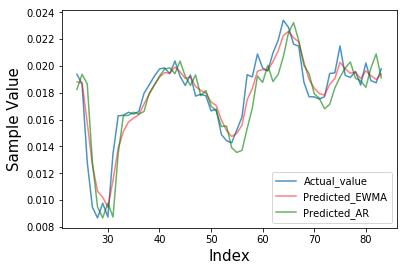

EWMA error:  4.75513218749 %
AUTO REG error:  7.64812379233 %


In [29]:
calcTimeSeries(X)

In [1]:
print X

NameError: name 'X' is not defined